<a href="https://colab.research.google.com/github/Nataliahfk/Telecom-X_-segundo-challenge/blob/main/Telecom_X_Clallenge_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X - Análisis de Evasión de Clientes**

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El ánalisis contiene:

- Importación y manipulación de datos desde una API.
- Aplicación de los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
- Creación de visualizaciones estratégicas para identificar patrones y tendencias.
- Análisis Exploratorio de Datos (EDA) e informe con insights relevantes.

##📌 Extracción

In [138]:
import requests
import pandas as pd
import json
import numpy as np

#accediedo a la API

url = ('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

# requests.get envía una solicitud HTTP GET a una URL específica.
respuesta = requests.get(url)
# Convierte la respuesta JSON (texto) a un objeto Python (dict o list).
data = respuesta.json()
# Creo el DataFrame
df = pd.DataFrame(data)
df


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [139]:
# Esto lo puedo hacer cuando descargo el archivo y lo guardo en mi PC
#df_json = pd.read_json('TelecomX_Data.json')
#df_json

##🔧 Transformación

###**Normalización DF**

In [140]:
df_normalizado = pd.json_normalize(data)
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###**Renombrando las columnas y revisión**

In [141]:
# inplace=True 👉 Modifica el DataFrame original en el lugar
df_normalizado.rename(columns={
 'customerID':'id_cliente',
 'Churn':'abandono',
 'customer.gender':'genero_cliente',
 'customer.SeniorCitizen':'cliente_senior',
 'customer.Partner':'tiene_pareja',
 'customer.Dependents':'dependientes',
 'customer.tenure': 'meses_en_empresa',
 'phone.PhoneService':'servicio_telefonico',
 'phone.MultipleLines':'lineas_multiples',
 'internet.InternetService':'servicio_internet',
 'internet.OnlineSecurity':'seguridad_online',
 'internet.OnlineBackup':'respaldo_online',
 'internet.DeviceProtection':'proteccion_dispositivo',
 'internet.TechSupport':'soporte_tecnico',
 'internet.StreamingTV':'tv_streaming',
 'internet.StreamingMovies':'peliculas_streaming',
 'account.Contract':'tipo_contrato',
 'account.PaperlessBilling':'factura_electronica',
 'account.PaymentMethod':'metodo_pago',
 'account.Charges.Monthly':'cargo_mensual',
 'account.Charges.Total':'cargo_total'
}, inplace=True)

df_normalizado.head()

,id_cliente,abandono,genero_cliente,cliente_senior,tiene_pareja,dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [142]:
df_normalizado.columns

Index(['id_cliente', 'abandono', 'genero_cliente', 'cliente_senior',
       'tiene_pareja', 'dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total'],
      dtype='object')

In [143]:
#verificación que no existan datos null
print('N° de Nulos:',df_normalizado.isnull().sum())

N° de Nulos: id_cliente                0
abandono                  0
genero_cliente            0
cliente_senior            0
tiene_pareja              0
dependientes              0
meses_en_empresa          0
servicio_telefonico       0
lineas_multiples          0
servicio_internet         0
seguridad_online          0
respaldo_online           0
proteccion_dispositivo    0
soporte_tecnico           0
tv_streaming              0
peliculas_streaming       0
tipo_contrato             0
factura_electronica       0
metodo_pago               0
cargo_mensual             0
cargo_total               0
dtype: int64


In [144]:
#Duplicados
print('N° de duplicados:', df_normalizado.duplicated().sum())

N° de duplicados: 0


In [145]:
# Verifique si hay valores únicos en cada columna
for columna in df_normalizado.columns:
  print(f"valores únicos en la columna'{columna}': {df_normalizado[columna].nunique()}")
  if df_normalizado[columna].nunique() < 20:
    print(df_normalizado[columna].unique())
  print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'id_cliente': 7267
--------------------------------------------------
valores únicos en la columna'abandono': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'genero_cliente': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'cliente_senior': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'tiene_pareja': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'dependientes': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'meses_en_empresa': 73
--------------------------------------------------
valores únicos en la columna'servicio_telefonico': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'lineas_multiples': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------

In [146]:
info_abandono = df_normalizado.query("abandono == ''")
info_abandono.sample(10)

,id_cliente,abandono,genero_cliente,cliente_senior,tiene_pareja,dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
4128,5653-ITXJK,,Female,0,Yes,No,31,Yes,No,DSL,...,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.20,1498.55
4579,6272-HWGNQ,,Female,0,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85
540,0769-WXZYU,,Male,0,No,No,34,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),26.10,980.35
973,1370-AQYEM,,Male,0,Yes,Yes,5,Yes,No,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,90.35,434.5
842,1195-UQFHQ,,Male,0,No,No,61,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,One year,No,Electronic check,104.00,6363.45
4762,6519-JNHOZ,,Female,0,Yes,No,48,Yes,No,DSL,...,Yes,Yes,No,No,Yes,One year,Yes,Electronic check,65.65,3094.65
5001,6840-YEOYJ,,Male,0,No,Yes,53,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,No,Credit card (automatic),62.85,3419.5
2913,4047-GGUUG,,Female,0,No,No,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.45,227.45
7016,9659-UDJIJ,,Female,0,Yes,No,67,Yes,Yes,DSL,...,Yes,Yes,No,No,No,Two year,No,Mailed check,65.65,4322.85
6693,9218-TUMIQ,,Female,0,Yes,Yes,62,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,6283.3


In [147]:
# Vacíos o en blanco
# x.astype(str) convierte todos los valores de la columna a texto (string).
# .str.strip() elimina espacios en blanco al inicio y final de cada string.
# == '' compara si el valor, una vez convertido a string y sin espacios al inicio o final, es una cadena vacía.
valores_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(valores_vacios)

id_cliente                  0
abandono                  224
genero_cliente              0
cliente_senior              0
tiene_pareja                0
dependientes                0
meses_en_empresa            0
servicio_telefonico         0
lineas_multiples            0
servicio_internet           0
seguridad_online            0
respaldo_online             0
proteccion_dispositivo      0
soporte_tecnico             0
tv_streaming                0
peliculas_streaming         0
tipo_contrato               0
factura_electronica         0
metodo_pago                 0
cargo_mensual               0
cargo_total                11
dtype: int64


In [148]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero_cliente          7267 non-null   object 
 3   cliente_senior          7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   dependientes            7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

###**Limpieza Datos**

In [149]:
# Cambiando la columna 'cargo_total' a Float y reemplazar espacios vacíos por NaN
df_normalizado['cargo_total'] = df_normalizado['cargo_total'].replace('',np.nan)
# Convertir todo a numérico
df_normalizado['cargo_total'] = pd.to_numeric(df_normalizado['cargo_total'], errors='coerce')
print(df_normalizado['cargo_total'].dtypes)

float64


In [150]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero_cliente          7267 non-null   object 
 3   cliente_senior          7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   dependientes            7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [151]:
# Confirmar vacios en columna 'cargo_total'
datos_blanco= (df_normalizado['cargo_total'] == '').sum()
print('Los datos blancos en la columna cargo_total son:', datos_blanco)

Los datos blancos en la columna cargo_total son: 0


In [152]:
# Hay 224 datos en la columna 'abandono', corresponde al 3.08% , lo que no afecta al analisís si los datos son eliminados.
# Eliminar datos vacios en columna 'abandono'
df_normalizado = df_normalizado.dropna(subset=['abandono']) #Elimina solo las filas donde columna 'abandono' sean NaN (nulo)
df_normalizado = df_normalizado[df_normalizado['abandono'].str.strip() != '']
df_normalizado

,id_cliente,abandono,genero_cliente,cliente_senior,tiene_pareja,dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [153]:
# reindexar para que los índices queden consecutivos
df_normalizado=df_normalizado.reset_index(drop=True)
df_normalizado

,id_cliente,abandono,genero_cliente,cliente_senior,tiene_pareja,dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [154]:
# Confirmar vacios en columna 'abandono'
datos_blanco_abandono= (df_normalizado['abandono'] == '').sum()
print('Los datos blancos en la columna abandono son:', datos_blanco_abandono)

Los datos blancos en la columna abandono son: 0


In [155]:
# Confirmar vacios y blancos depués de la limpieza de datos
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
id_cliente,0
abandono,0
genero_cliente,0
cliente_senior,0
tiene_pareja,0
dependientes,0
meses_en_empresa,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


###**Limpieza de datos texto**

In [156]:
# limpieza columna id del cliente /.strip() elimina espacios en blanco al inicio y al final
df_normalizado['id_cliente'] = df_normalizado['id_cliente'].str.strip()
df_normalizado['id_cliente'].head(10)

,id_cliente
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
5,0013-MHZWF
6,0013-SMEOE
7,0014-BMAQU
8,0015-UOCOJ
9,0016-QLJIS


In [157]:
#limpieza de la columna tipo_contrato
df_normalizado['tipo_contrato'] = df_normalizado['tipo_contrato'].str.lower()
df_normalizado['tipo_contrato'] = df_normalizado['tipo_contrato'].apply(lambda x: x.replace('-',' ').strip())
df_normalizado['tipo_contrato'].head(10)

,tipo_contrato
0,one year
1,month to month
2,month to month
3,month to month
4,month to month
5,month to month
6,two year
7,two year
8,month to month
9,two year


In [158]:
#limpieza de la columna metodo_pago
df_normalizado['metodo_pago'] = df_normalizado['metodo_pago'].str.lower().str.strip()
df_normalizado['metodo_pago'].sample(10)

,metodo_pago
6432,electronic check
1806,credit card (automatic)
2912,electronic check
2265,mailed check
3812,bank transfer (automatic)
6533,mailed check
1803,electronic check
3209,electronic check
4700,mailed check
3624,credit card (automatic)


In [159]:
info = df_normalizado.query("servicio_internet in ['No']")
info.sample(5)

,id_cliente,abandono,genero_cliente,cliente_senior,tiene_pareja,dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
1918,2792-VPPET,No,Male,0,No,No,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,month to month,Yes,electronic check,20.50,76.95
2100,3011-WQKSZ,No,Male,0,No,Yes,19,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,month to month,Yes,electronic check,20.00,377.55
148,0247-SLUJI,No,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,month to month,No,mailed check,19.70,19.70
1164,1709-EJDOX,No,Female,0,Yes,Yes,47,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,two year,No,mailed check,19.75,948.90
5663,7980-MHFLQ,No,Female,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,two year,No,mailed check,24.90,1859.20


In [160]:
df_normalizado.describe()

,cliente_senior,meses_en_empresa,cargo_mensual,cargo_total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


##**📊 Carga y análisis**

In [161]:
# crear la columna "Cuentas_Diarias"
df_normalizado['cuentas_diarias']= df_normalizado['cargo_mensual']/30
df_normalizado[['cuentas_diarias','cargo_mensual']].tail()

,cuentas_diarias,cargo_mensual
7038,1.838333,55.15
7039,2.836667,85.10
7040,1.676667,50.30
7041,2.261667,67.85
7042,1.966667,59.00


##**Estandarización y transformación de datos**

In [162]:
df_normalizado.columns

Index(['id_cliente', 'abandono', 'genero_cliente', 'cliente_senior',
       'tiene_pareja', 'dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total', 'cuentas_diarias'],
      dtype='object')

In [163]:
columnas_binario = ['abandono','tiene_pareja','dependientes','servicio_telefonico','factura_electronica']
df_normalizado[columnas_binario].sample(10)

,abandono,tiene_pareja,dependientes,servicio_telefonico,factura_electronica
4051,Yes,No,No,Yes,No
4575,Yes,No,No,Yes,Yes
6510,No,No,No,No,No
1003,No,Yes,Yes,Yes,Yes
6929,No,Yes,Yes,No,No
5881,No,No,No,Yes,Yes
2988,No,No,No,Yes,Yes
145,No,Yes,Yes,Yes,No
6225,No,No,No,Yes,No
6969,Yes,No,No,Yes,No


In [164]:
## Transformar columnas binarias: 'Yes' en 1 y 'No' en 0
df_normalizado.loc[:, columnas_binario] = df_normalizado[columnas_binario].astype(str)
# Usa map en vez de replace
df_normalizado.loc[:, columnas_binario] = df_normalizado.loc[:, columnas_binario].apply(
    lambda col: col.map({'Yes': 1, 'No': 0})
)
print(df_normalizado.loc[:, columnas_binario].isna().sum())
df_normalizado[columnas_binario].sample(4)

abandono               0
tiene_pareja           0
dependientes           0
servicio_telefonico    0
factura_electronica    0
dtype: int64


,abandono,tiene_pareja,dependientes,servicio_telefonico,factura_electronica
5856,1,0,0,1,1
6924,1,1,1,1,1
2720,0,1,1,1,1
1902,0,1,0,0,0


In [165]:
df_normalizado['genero_cliente']= df_normalizado['genero_cliente'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df_normalizado['genero_cliente'].sample(4)

,genero_cliente
3090,Masculino
6074,Femenino
1248,Femenino
2393,Masculino


## 📊 Carga y análisis



In [166]:
df_normalizado.describe()

,cliente_senior,meses_en_empresa,cargo_mensual,cargo_total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


##**Distribución de evasión**

###**Recuento de evasión por variables categóricas**

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [168]:
print(df_normalizado['abandono'].unique())

[0 1]


In [169]:
print(df_normalizado.groupby(['genero_cliente', 'abandono']).size())

genero_cliente  abandono
Femenino        0           2549
                1            939
Masculino       0           2625
                1            930
dtype: int64


In [170]:
# Verifica
print(df_normalizado['cliente_senior'].unique())

[0 1]


In [171]:
# 👇 Reemplaza strings
df_normalizado['genero_cliente'] = df_normalizado['genero_cliente'].astype(str).str.strip().str.capitalize()
df_normalizado['abandono'] = df_normalizado['abandono'].astype(str).str.strip().str.capitalize()
df_normalizado['abandono'] = df_normalizado['abandono'].replace({'1': 'Yes', '0': 'No'})


# Verifica
print(df_normalizado['abandono'].unique())

fig = px.histogram(
    df_normalizado,
    x='genero_cliente',
    color='abandono',
    barmode='group',
    text_auto=True,
    title='Distribución de clientes por género y abandono',
    labels={
        'genero_cliente': 'Género del Cliente',
        'abandono': 'Estado de Abandono'
    },
    color_discrete_map={
        'Yes': '#E8A031',
        'No': '#2C5F77'
    }
)

fig.update_layout(
    xaxis_title='Género del Cliente',
    yaxis_title='Cantidad de Clientes',
    legend_title='Abandono',
    bargap=0.2,
    template='plotly_white',
    font=dict(size=14)
)

# Guardar la figura como imagen
fig.write_html('/content/distribución_clientes_abandono_por_genero.png')

fig.show()

['No' 'Yes']


In [172]:
"""
df_normalizado['cliente_senior'] = df_normalizado['cliente_senior'].map({0: 'No Senior', 1: 'Senior'})

fig = px.histogram(
    df_normalizado,
    x='cliente_senior',
    color='abandono',
    barmode='group',
    text_auto=True,
    title='Distribución de clientes senior v/s abandono',
    labels={
        'cliente_senior': 'Cliente Senior',
        'abandono': 'Estado de Abandono'
    },
    color_discrete_map={
        'Yes': '#E8A031',
        'No': '#2C5F77'
    }
)

fig.update_layout(
    xaxis_title='Cliente',
    yaxis_title='Cantidad de Clientes',
    legend_title='Abandono',
    bargap=0.2,
    template='plotly_white',
    font=dict(size=14)
)

fig.show()
"""

"\ndf_normalizado['cliente_senior'] = df_normalizado['cliente_senior'].map({0: 'No Senior', 1: 'Senior'})\n\nfig = px.histogram(\n    df_normalizado,\n    x='cliente_senior',\n    color='abandono',\n    barmode='group',\n    text_auto=True,\n    title='Distribución de clientes senior v/s abandono',\n    labels={\n        'cliente_senior': 'Cliente Senior',\n        'abandono': 'Estado de Abandono'\n    },\n    color_discrete_map={\n        'Yes': '#E8A031',\n        'No': '#2C5F77'\n    }\n)\n\nfig.update_layout(\n    xaxis_title='Cliente',\n    yaxis_title='Cantidad de Clientes',\n    legend_title='Abandono',\n    bargap=0.2,\n    template='plotly_white',\n    font=dict(size=14)\n)\n\nfig.show()\n"

In [173]:
fig = px.histogram(
    df_normalizado,
    x='meses_en_empresa',
    color='abandono',
    barmode='group',  # igual a barras lado a lado
    text_auto=True,
    nbins=30,  # ajusta cantidad de rangos de meses
    color_discrete_map={
        'Yes': '#E8A031',  # Mostaza
        'No': '#2C5F77'    # Azul petróleo
    },
    title='Distribución de clientes por meses en la empresa y estado de abandono',
    labels={
        'meses_en_empresa': 'Meses en la Empresa',
        'abandono': 'Estado de Abandono'
    }
)

fig.update_layout(
    xaxis_title='Meses en la Empresa',
    yaxis_title='Cantidad de Clientes',
    legend_title='Abandono',
    bargap=0.1,
    template='plotly_white',
    font=dict(size=14)
)

# Guardar la figura como imagen
fig.write_html('/content/distribución_clientes_abandono_y_permanencia_cia.png')

fig.show()

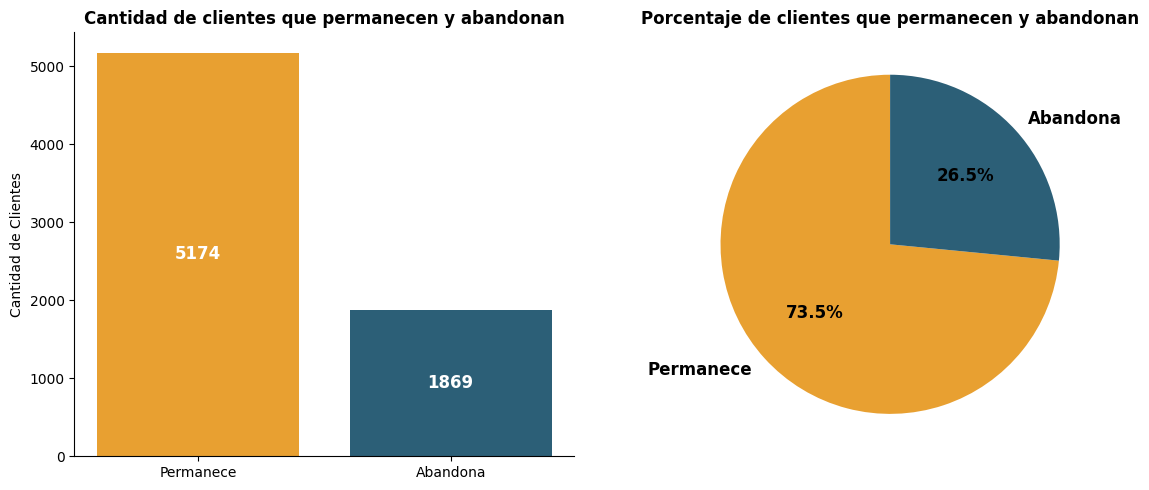

In [174]:
df_normalizado['abandono'] = (
    df_normalizado['abandono']
    .replace({'1': 'Yes', '0': 'No'})
    .astype(str)
    .str.strip()
    .str.capitalize()
)

# ✅ Crea figura con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Cuenta valores
abandono_counts = df_normalizado['abandono'].value_counts().sort_index()
labels = abandono_counts.index.map({'Yes': 'Abandona', 'No': 'Permanece'})
fig.subplots_adjust(hspace=1, wspace=1) # espacio entre gráficos h de horizontal y w de ancho
colors = ['#E8A031', '#2C5F77']


# 📊 Gráfico de barras
bars = axs[0].bar(labels, abandono_counts.values, color=colors)
axs[0].set_title('Cantidad de clientes que permanecen y abandonan', fontsize=12, weight='bold')
axs[0].set_ylabel('Cantidad de Clientes')

# Agrega valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2, # X: centro de la barra
        height / 2,                        # Y: mitad de la barra
        f'{int(height)}',
        ha='center',                       # Alineación horizontal
        va='center',                       # Alineación vertical
        fontsize=12,
        weight='bold',
        color = 'white'
    )

# 📊 Gráfico de pastel
wedges, texts, autotexts = axs[1].pie(
    abandono_counts.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'weight': 'bold'}
)
axs[1].set_title('Porcentaje de clientes que permanecen y abandonan', fontsize=12, weight='bold')

# Limpia bordes superiores/derechos
for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Guardar la figura como imagen
fig.savefig("grafico_abandono_clientes.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [175]:
# Función para ver distribución de abandono por cada categoría
def evasion_por_categoria(df, columna):
    tabla = pd.crosstab(df_normalizado[columna], df_normalizado['abandono'], normalize='index') * 100
    tabla.columns = ['% Permanece', '% Abandono']
    print(f'\nAnálisis para: {columna}')
    print(tabla)
    return tabla

# Variables categóricas a analizar
categoricas = ['genero_cliente', 'tipo_contrato', 'metodo_pago', 'servicio_internet']

# Aplicar análisis
resultados = {}
for cat in categoricas:
    resultados[cat] = evasion_por_categoria(df_normalizado, cat)


Análisis para: genero_cliente
                % Permanece  % Abandono
genero_cliente                         
Femenino          73.079128   26.920872
Masculino         73.839662   26.160338

Análisis para: tipo_contrato
                % Permanece  % Abandono
tipo_contrato                          
month to month    57.290323   42.709677
one year          88.730482   11.269518
two year          97.168142    2.831858

Análisis para: metodo_pago
                           % Permanece  % Abandono
metodo_pago                                       
bank transfer (automatic)    83.290155   16.709845
credit card (automatic)      84.756899   15.243101
electronic check             54.714588   45.285412
mailed check                 80.893300   19.106700

Análisis para: servicio_internet
                   % Permanece  % Abandono
servicio_internet                         
DSL                  81.040892   18.959108
Fiber optic          58.107235   41.892765
No                   92.595020    7.404

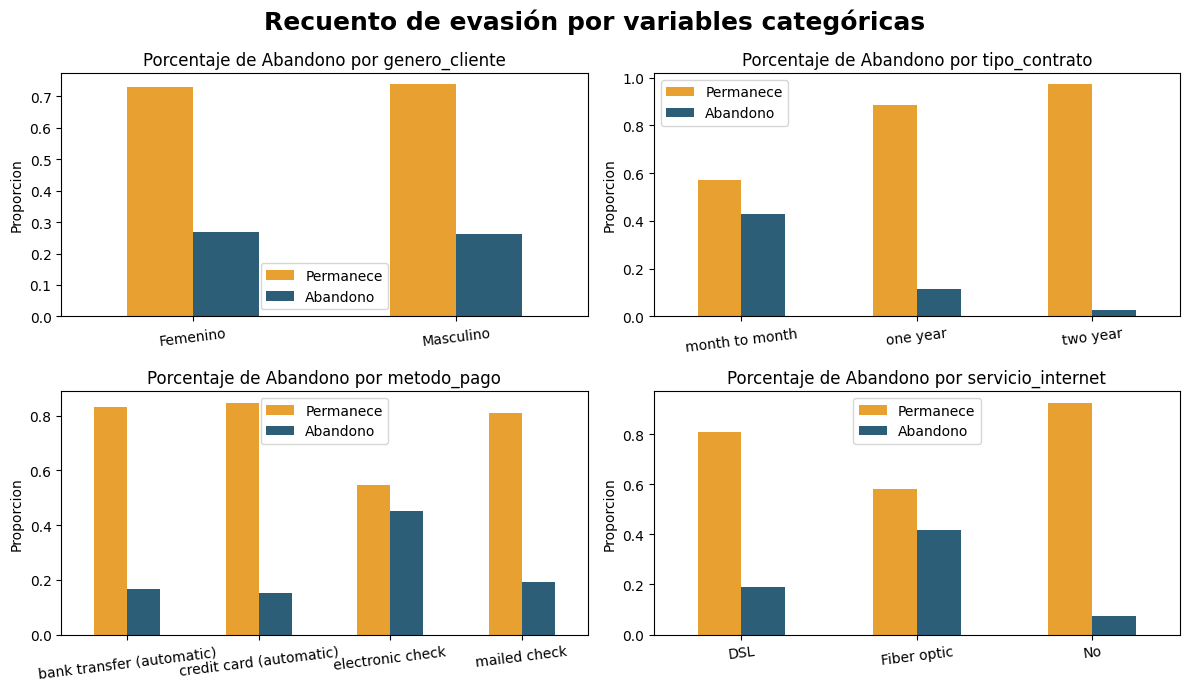

In [176]:
# 2 gráficos por fila
fig, axs = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=2, figsize=(12,7))
axs = axs.flatten()
colors = ['#E8A031', '#2C5F77']

# Crear cada gráfico en su subplot
for i, cat in enumerate(categoricas):
    tabla = pd.crosstab(df_normalizado[cat], df_normalizado['abandono'], normalize='index')
    tabla.plot(kind='bar', ax=axs[i], color=colors)

    axs[i].set_title(f'Porcentaje de Abandono por {cat}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Proporcion')
    axs[i].legend(title='Abandono')
    axs[i].legend(['Permanece', 'Abandono'])
    axs[i].tick_params(axis='x', rotation=7)


plt.suptitle('Recuento de evasión por variables categóricas', fontsize=18, weight='bold', ha='center')

# Guardar la figura como imagen
fig.savefig("gráfico_evasión_por_variables_categóricas.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

####**Análisis de evasión en columnas binarias**

In [177]:
binarias = ['cliente_senior', 'tiene_pareja', 'dependientes', 'servicio_telefonico', 'factura_electronica']

def evasion_cat_binarias(df, columna):
    df_temporal = df.copy()
    df_temporal[columna] = df_temporal[columna].map({1: 'Sí', 0: 'No'})

    tabla = pd.crosstab(df_temporal[columna], df_temporal['abandono'], normalize='index') * 100

    # Reindexa para forzar que siempre tenga ambas columnas, aunque no existan datos
    tabla = tabla.reindex(columns=['No', 'Yes'], fill_value=0)
    tabla.columns = ['% Permanece', '% Abandono']

    print(f'\nAnálisis para: {columna}')
    print(tabla)
    return tabla

# Variables categóricas a analizar
categoricas = ['tiene_pareja','dependientes','servicio_telefonico','factura_electronica']

# Aplicar análisis
resultados_binarios = {}
for col in binarias:
    resultados_binarios[col] = evasion_cat_binarias(df_normalizado, col)


Análisis para: cliente_senior
                % Permanece  % Abandono
cliente_senior                         
No                76.393832   23.606168
Sí                58.318739   41.681261

Análisis para: tiene_pareja
              % Permanece  % Abandono
tiene_pareja                         
No              67.042021   32.957979
Sí              80.335097   19.664903

Análisis para: dependientes
              % Permanece  % Abandono
dependientes                         
No              68.720860   31.279140
Sí              84.549763   15.450237

Análisis para: servicio_telefonico
                     % Permanece  % Abandono
servicio_telefonico                         
No                     75.073314   24.926686
Sí                     73.290363   26.709637

Análisis para: factura_electronica
                     % Permanece  % Abandono
factura_electronica                         
No                     83.669916   16.330084
Sí                     66.434908   33.565092


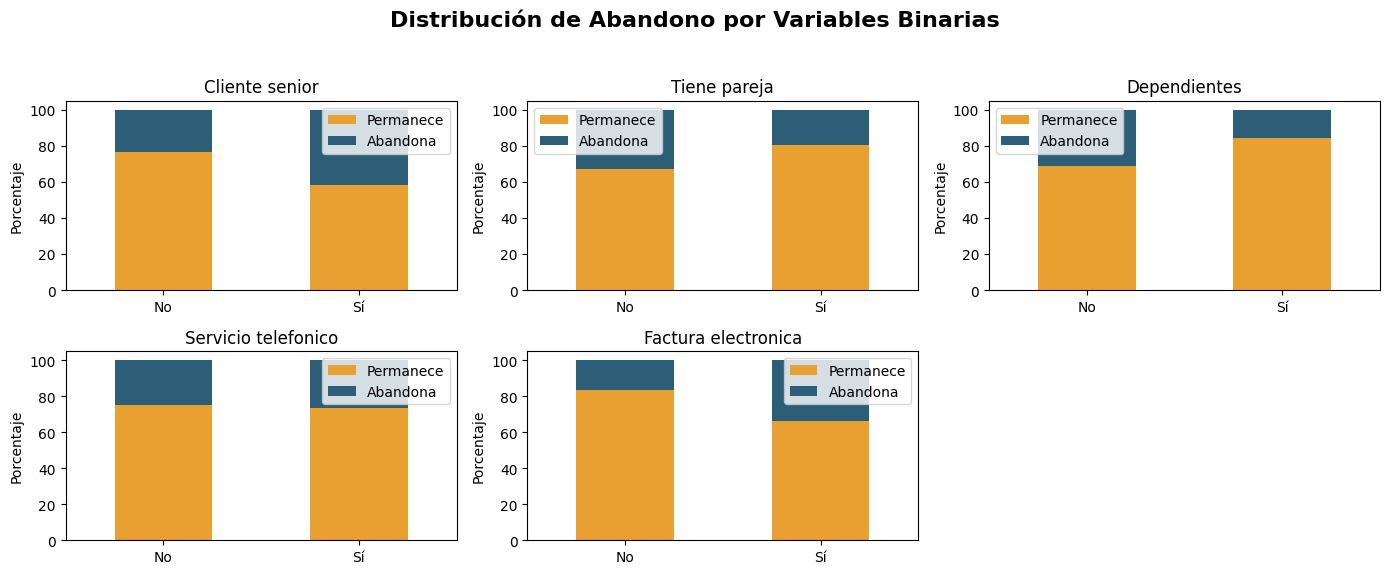

In [178]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axs = axes.flatten()
colors = ['#E8A031', '#2C5F77']

for i, col in enumerate(binarias):
    df_temporal = df_normalizado.copy()
    df_temporal[col] = df_temporal[col].map({1: 'Sí', 0: 'No'})

    tabla = pd.crosstab(df_temporal[col], df_temporal['abandono'], normalize='index') * 100
    tabla = tabla.reindex(columns=['No', 'Yes'], fill_value=0)  # Asegurar orden y columnas
    tabla.columns = ['Permanece', 'Abandona']

    tabla.plot(kind='bar', stacked=True, color=colors, ax=axs[i])

    axs[i].set_title(f'{col.replace("_", " ").capitalize()}', fontsize=12)
    axs[i].set_ylabel('Porcentaje')
    axs[i].set_xlabel('')
    axs[i].legend(loc='best')
    axs[i].tick_params(axis='x', rotation=0)

# Eliminar subplot vacío (si hay)
if len(binarias) < len(axs):
    for j in range(len(binarias), len(axs)):
        fig.delaxes(axs[j])

plt.suptitle('Distribución de Abandono por Variables Binarias',
             fontsize=16, weight='bold', ha='center')

# Guardar la figura como imagen
fig.savefig("gráfico_evasión_por_variables_binarias.png", dpi=300, bbox_inches='tight')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [179]:
# Agrupa por cantidad de meses y abandono
resumen_meses = df_normalizado.groupby(['meses_en_empresa', 'abandono']).size().reset_index(name='conteo')

# Pivot para tabla
tabla_pivot = resumen_meses.pivot(
              index='meses_en_empresa',  # fila
              columns='abandono',        # columna
              values='conteo').fillna(0) # valores

# Calcular la tasa
tabla_pivot['tasa_abandono'] = ((tabla_pivot['Yes'] / (tabla_pivot['Yes'] + tabla_pivot['No'])) * 100).round(3)


print(tabla_pivot[['tasa_abandono']])


abandono          tasa_abandono
meses_en_empresa               
0                         0.000
1                        61.990
2                        51.681
3                        47.000
4                        47.159
...                         ...
68                        9.000
69                        8.421
70                        9.244
71                        3.529
72                        1.657

[73 rows x 1 columns]


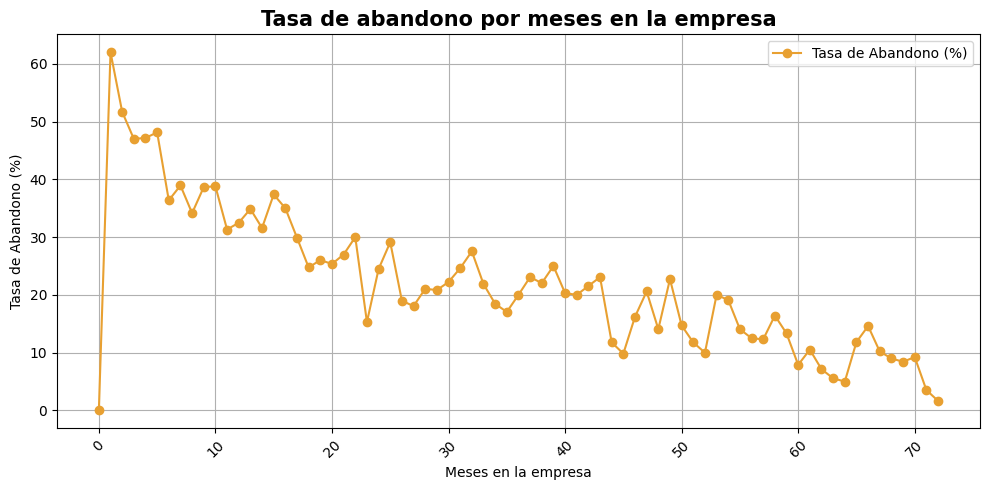

In [180]:
plt.figure(figsize=(10, 5))
plt.plot(tabla_pivot.index, tabla_pivot['tasa_abandono'], marker='o', color='#E8A031', label='Tasa de Abandono (%)')

plt.title('Tasa de abandono por meses en la empresa', fontsize=15, weight='bold')
plt.xlabel('Meses en la empresa')
plt.ylabel('Tasa de Abandono (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Guardar la figura como imagen
fig.savefig("tasa_abandono_vs_permanencia_empresa.png", dpi=300, bbox_inches='tight')

plt.show()

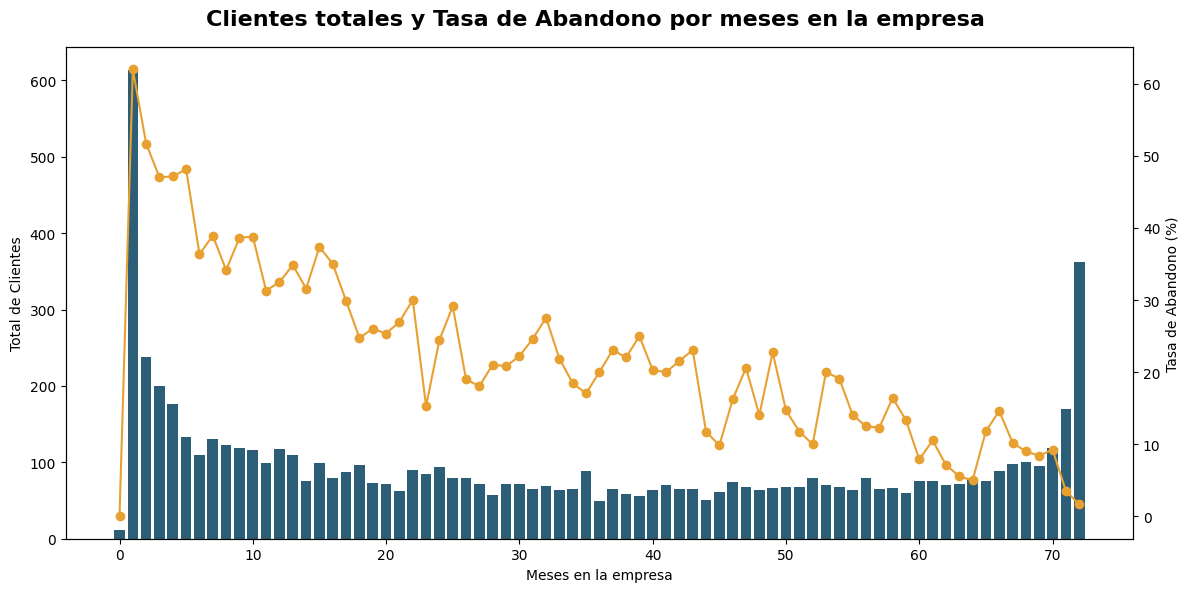

In [181]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras: Total de clientes por meses en la cia.
total_clientes = tabla_pivot['Yes'] + tabla_pivot['No']
ax1.bar(tabla_pivot.index, total_clientes, color='#2C5F77', label='Total Clientes')
ax1.set_xlabel('Meses en la empresa')
ax1.set_ylabel('Total de Clientes', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Línea: tasa_abandono
ax2 = ax1.twinx()
ax2.plot(tabla_pivot.index, tabla_pivot['tasa_abandono'], color='#E8A031', marker='o', label='Tasa de Abandono (%)')
ax2.set_ylabel('Tasa de Abandono (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Títulos y leyenda
fig.suptitle('Clientes totales y Tasa de Abandono por meses en la empresa', fontsize=16, weight='bold')

# Guardar la figura como imagen
fig.savefig("tasa_abandono_vs_clientes_totales.png", dpi=300, bbox_inches='tight')

fig.tight_layout()
plt.show()


###**Conteo de evasión por variables numéricas**

In [182]:
colors = {'Yes': '#E8A031', 'No': '#2C5F77'}  # Ajusta según los valores que tengas en 'abandono'

fig = px.scatter(
    df_normalizado,
    x="meses_en_empresa",
    y="cargo_mensual",
    color='abandono',
    color_discrete_map=colors, # comando para utilizar colores definidos arriba
    title="Meses en la empresa vs Cargos mensuales por Abandono"
)

# Guardar la figura como imagen
fig.write_html('/content/permanencia_cia_vs_cargo_mensual_mapa_calor.png')

fig.show()

In [183]:
colors = {'Yes': '#E8A031', 'No': '#2C5F77'}

fig = px.histogram(
    df_normalizado,
    x='tipo_contrato',
    color='abandono',
    barmode='group',
    text_auto=True,
    color_discrete_map=colors,
    title='Distribución por Tipo de Contrato y Abandono'
)

# Guardar la figura como imagen
fig.write_html('/content/distribución_clientes_abandono_tipo_contrato.png')
fig.show()

In [184]:
colors = {'Yes': '#E8A031', 'No': '#2C5F77'}

fig = px.box(df_normalizado,
             x = 'abandono',
             y = 'cargo_mensual',
             color = 'abandono',
             color_discrete_map=colors,
             title='Análisis del Cargo Mensual en Clientes según Abandono')

# Guardar la figura como imagen
fig.write_html('/content/analisis_cargo_mensual_vs_abandono_grafico_box.png')
fig.show()

In [185]:
colors = {'Yes': '#E8A031', 'No': '#2C5F77'}

# Crear un DataFrame temporal con la columna mapeada solo para el gráfico
df_temp = df_normalizado.assign(
    servicio_telefonico_desc=df_normalizado['servicio_telefonico'].map({
        0: 'No tiene servicio telefónico',
        1: 'Sí tiene servicio telefónico'
    })
)

fig = px.histogram(
    df_temp,
    x='servicio_telefonico_desc',
    text_auto=True,
    color='abandono',
    barmode='group',
    color_discrete_map=colors,
    title='Distribución del Servicio Telefónico según Abandono de Clientes'
)

# Guardar la figura como imagen
fig.write_html('/content/distibución_servicio_telefonico_vs_abandono.png')

fig.show()

In [186]:
colors = {'Yes': '#E8A031', 'No': '#2C5F77'}

fig = px.histogram(
    df_normalizado,
    x='servicio_internet',
    text_auto=True,
    color='abandono',
    barmode='group',
    color_discrete_map=colors,
    title='Distribución del Servicio Internet según Abandono de Clientes'
)

# Guardar la figura como imagen
fig.write_html('/content/distribución_servicio_internet_vs_abandono.png')

fig.show()

In [187]:
df_normalizado.columns

Index(['id_cliente', 'abandono', 'genero_cliente', 'cliente_senior',
       'tiene_pareja', 'dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total', 'cuentas_diarias'],
      dtype='object')

In [188]:
colors = {'Yes': '#E8A031', 'No': '#2C5F77'}

fig = px.histogram(
    df_normalizado,
    x='tv_streaming',
    text_auto=True,
    color='abandono',
    barmode='group',
    color_discrete_map=colors,
    title='Distribución del Servicio Streaming_TV según Abandono de Clientes'
)

# Guardar la figura como imagen
fig.write_html('/content/distribución_servicio_streaming_tv_vs_abandono.png')

fig.show()

In [189]:
fig = px.histogram(
    df_normalizado,
    x='metodo_pago',
    text_auto=True,
    color='abandono',
    barmode='group',
    color_discrete_map=colors,
    title='Distribución del Abandono de Clientes según Método de Pago'
)

# Guardar la figura como imagen
fig.write_html('/content/distribución_abandono_según_metodo_pago.png')

fig.show()

Mapa de calor de correlaciones

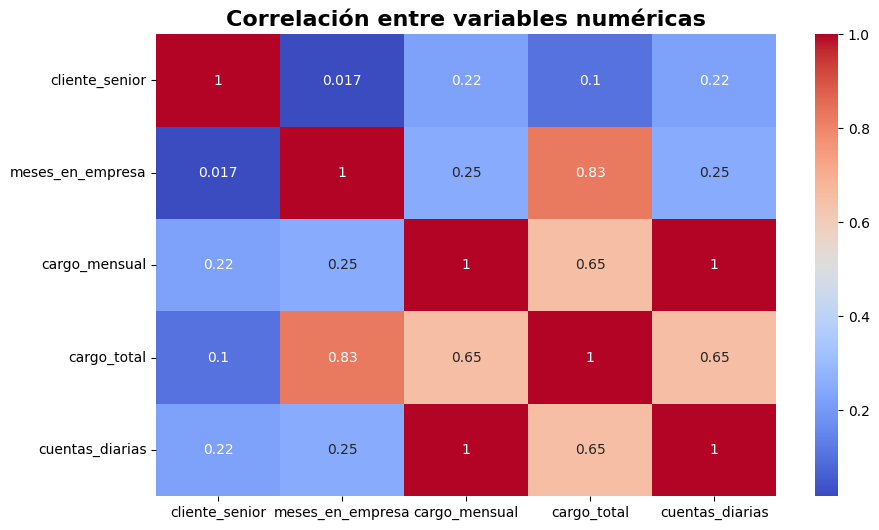

In [190]:
plt.figure(figsize=(10,6))
sns.heatmap(df_normalizado.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables numéricas", fontsize=16, weight='bold', ha='center')
plt.show()

In [192]:
# Lista de variables numéricas a analizar
numericas = ['meses_en_empresa', 'cargo_mensual', 'cargo_total', 'cuentas_diarias']

def analizar_evasion_numericas(df, columnas, bins=4):
    """
    Analiza la evasión (abandono) de clientes segmentando variables numéricas en rangos.

    Args:
        df (DataFrame): El DataFrame con los datos.
        columnas (list): Lista de columnas numéricas a analizar.
        bins (int): Cantidad de intervalos para agrupar cada variable.

    Returns:
        dict: Diccionario con tablas de frecuencia relativas para cada variable.
    """
    resultados = {}

    for col in columnas:
        # Crear rangos (bins) usando cuantiles
        df[f'{col}_bin'] = pd.qcut(df[col], q=bins, duplicates='drop')

        # Tabla cruzada: porcentaje de abandono por rango
        tabla = ((pd.crosstab(df[f'{col}_bin'], df['abandono'], normalize='index') * 100).round(2))
        tabla.columns = ['% Permanece', '% Abandono']

        print(f'\nAnálisis por rangos para: {col}')
        print(tabla)

        resultados[col] = tabla

    return resultados

# Ejecutar análisis
resultados_numericas = analizar_evasion_numericas(df_normalizado, numericas, bins=5)



Análisis por rangos para: meses_en_empresa
                      % Permanece  % Abandono
meses_en_empresa_bin                         
(-0.001, 6.0]               47.06       52.94
(6.0, 20.0]                 66.57       33.43
(20.0, 40.0]                77.63       22.37
(40.0, 60.0]                84.44       15.56
(60.0, 72.0]                93.39        6.61

Análisis por rangos para: cargo_mensual
                   % Permanece  % Abandono
cargo_mensual_bin                         
(18.249, 25.05]          90.85        9.15
(25.05, 58.83]           75.02       24.98
(58.83, 79.1]            70.23       29.77
(79.1, 94.25]            63.89       36.11
(94.25, 118.75]          67.19       32.81

Análisis por rangos para: cargo_total
                    % Permanece  % Abandono
cargo_total_bin                            
(18.799, 267.07]          54.02       45.98
(267.07, 944.17]          71.05       28.95
(944.17, 2048.95]         79.23       20.77
(2048.95, 4475.41]        76.96  

In [193]:
import plotly.express as px
import pandas as pd

def graficar_barras_abandono_interactivo(df, columnas, bins=10, guardar_html=False, ruta_html='grafico_abandono.html'):
    datos_plot = []
    color_map = {0: '#2C5F77', 1: '#E8A031'}  # 0=No, 1=Yes

    for col in columnas:
        df_temp = df.copy()
        df_temp[f'{col}_bin'] = pd.qcut(df_temp[col], q=bins, duplicates='drop')
        df_temp[f'{col}_bin'] = df_temp[f'{col}_bin'].apply(lambda x: f"({x.left:.2f} - {x.right:.2f}]")

        resumen = df_temp.groupby(f'{col}_bin', observed=True)['abandono_num'].mean().reset_index()
        resumen['abandono_num'] = resumen['abandono_num'] * 100
        resumen['variable'] = col

        resumen = resumen.rename(columns={f'{col}_bin': 'rango', 'abandono_num': 'porcentaje_abandono'})
        datos_plot.append(resumen)

    datos_todos = pd.concat(datos_plot, ignore_index=True)

    fig = px.bar(
        datos_todos,
        x='rango',
        y='porcentaje_abandono',
        color='variable',
        barmode='group',
        title='Porcentaje de abandono según variables numéricas',
        labels={'rango': 'Rango de valor', 'porcentaje_abandono': '% de abandono', 'variable': 'Variable'},
        color_discrete_sequence=['#E8A031', '#2C5F77']  # mostaza y azul petróleo
    )

    fig.update_layout(
        width=900,
        height=500,
        xaxis_tickangle=-45,
        template='plotly_white',
        font=dict(family='Arial', size=14, color='black')
    )



    if guardar_html:
        fig.write_html(ruta_html)

    return fig

# Asegúrate de tener la columna 'abandono_num' antes de llamar a esta función
df_normalizado['abandono_num'] = df_normalizado['abandono'].map({'No': 0, 'Yes': 1})

numericas = ['meses_en_empresa', 'cargo_mensual', 'cargo_total', 'cuentas_diarias']
graficar_barras_abandono_interactivo(df_normalizado, numericas, guardar_html=True, ruta_html='telecomx_evasion_clientes.html')



##📝 Informe Final del Análisis de Evasión de Clientes (Churn)

##**🔹Introducción del caso**

El presente análisis tiene como propósito comprender los factores que inciden en la pérdida de clientes dentro de una empresa de telecomunicaciones. La evasión de clientes constituye un reto clave para la sostenibilidad y el crecimiento de la compañía, ya que captar nuevos usuarios implica, generalmente, un costo mayor que conservar a los actuales.

A través del estudio de datos históricos, se pretende detectar patrones de comportamiento y variables asociadas al abandono. Esta información permitirá anticipar posibles casos de evasión y diseñar estrategias más efectivas orientadas a fortalecer la fidelización y optimizar la retención de clientes.<br><br><br>


##**🔹Limpieza y Tratamiento de Datos**

Para preparar los datos y garantizar su calidad, se llevaron a cabo los siguientes pasos:

- **Importación:** Se obtuvieron los datos a través de una API de Telecom X, disponibles en formato JSON.

- **Limpieza de nombres de columnas:** Se eliminaron espacios innecesarios para facilitar la manipulación del DataFrame.

- **Conversión de tipos de datos:** Se ajustaron columnas a tipos adecuados (por ejemplo, numéricos), corrigiendo posibles errores de formato.

- **Depuración de registros incompletos:** Se eliminaron registros nulos o vacíos, especialmente en campos críticos como ID_Cliente.

- **Revisión de duplicados:** Se realizó una verificación para identificar posibles registros duplicados y garantizar que no existieran datos repetidos que pudieran distorsionar el análisis.

- **Verificación de categorías:** Se revisaron valores únicos y se estandarizaron categorías en campos clave como Abandono'Churn' y Género para garantizar la consistencia de la información.<br><br><br>


##**🔹 Análisis Exploratorio de Datos**

Se llevaron a cabo análisis estadísticos y visuales con el objetivo de comprender en mayor profundidad los datos y revelar patrones relacionados con el abandono de clientes (churn).<br><br>

**📊 Distribución general de la evasión**

<br>- Se identificó que aproximadamente el 26,5% de los clientes han decidido cancelar el servicio.



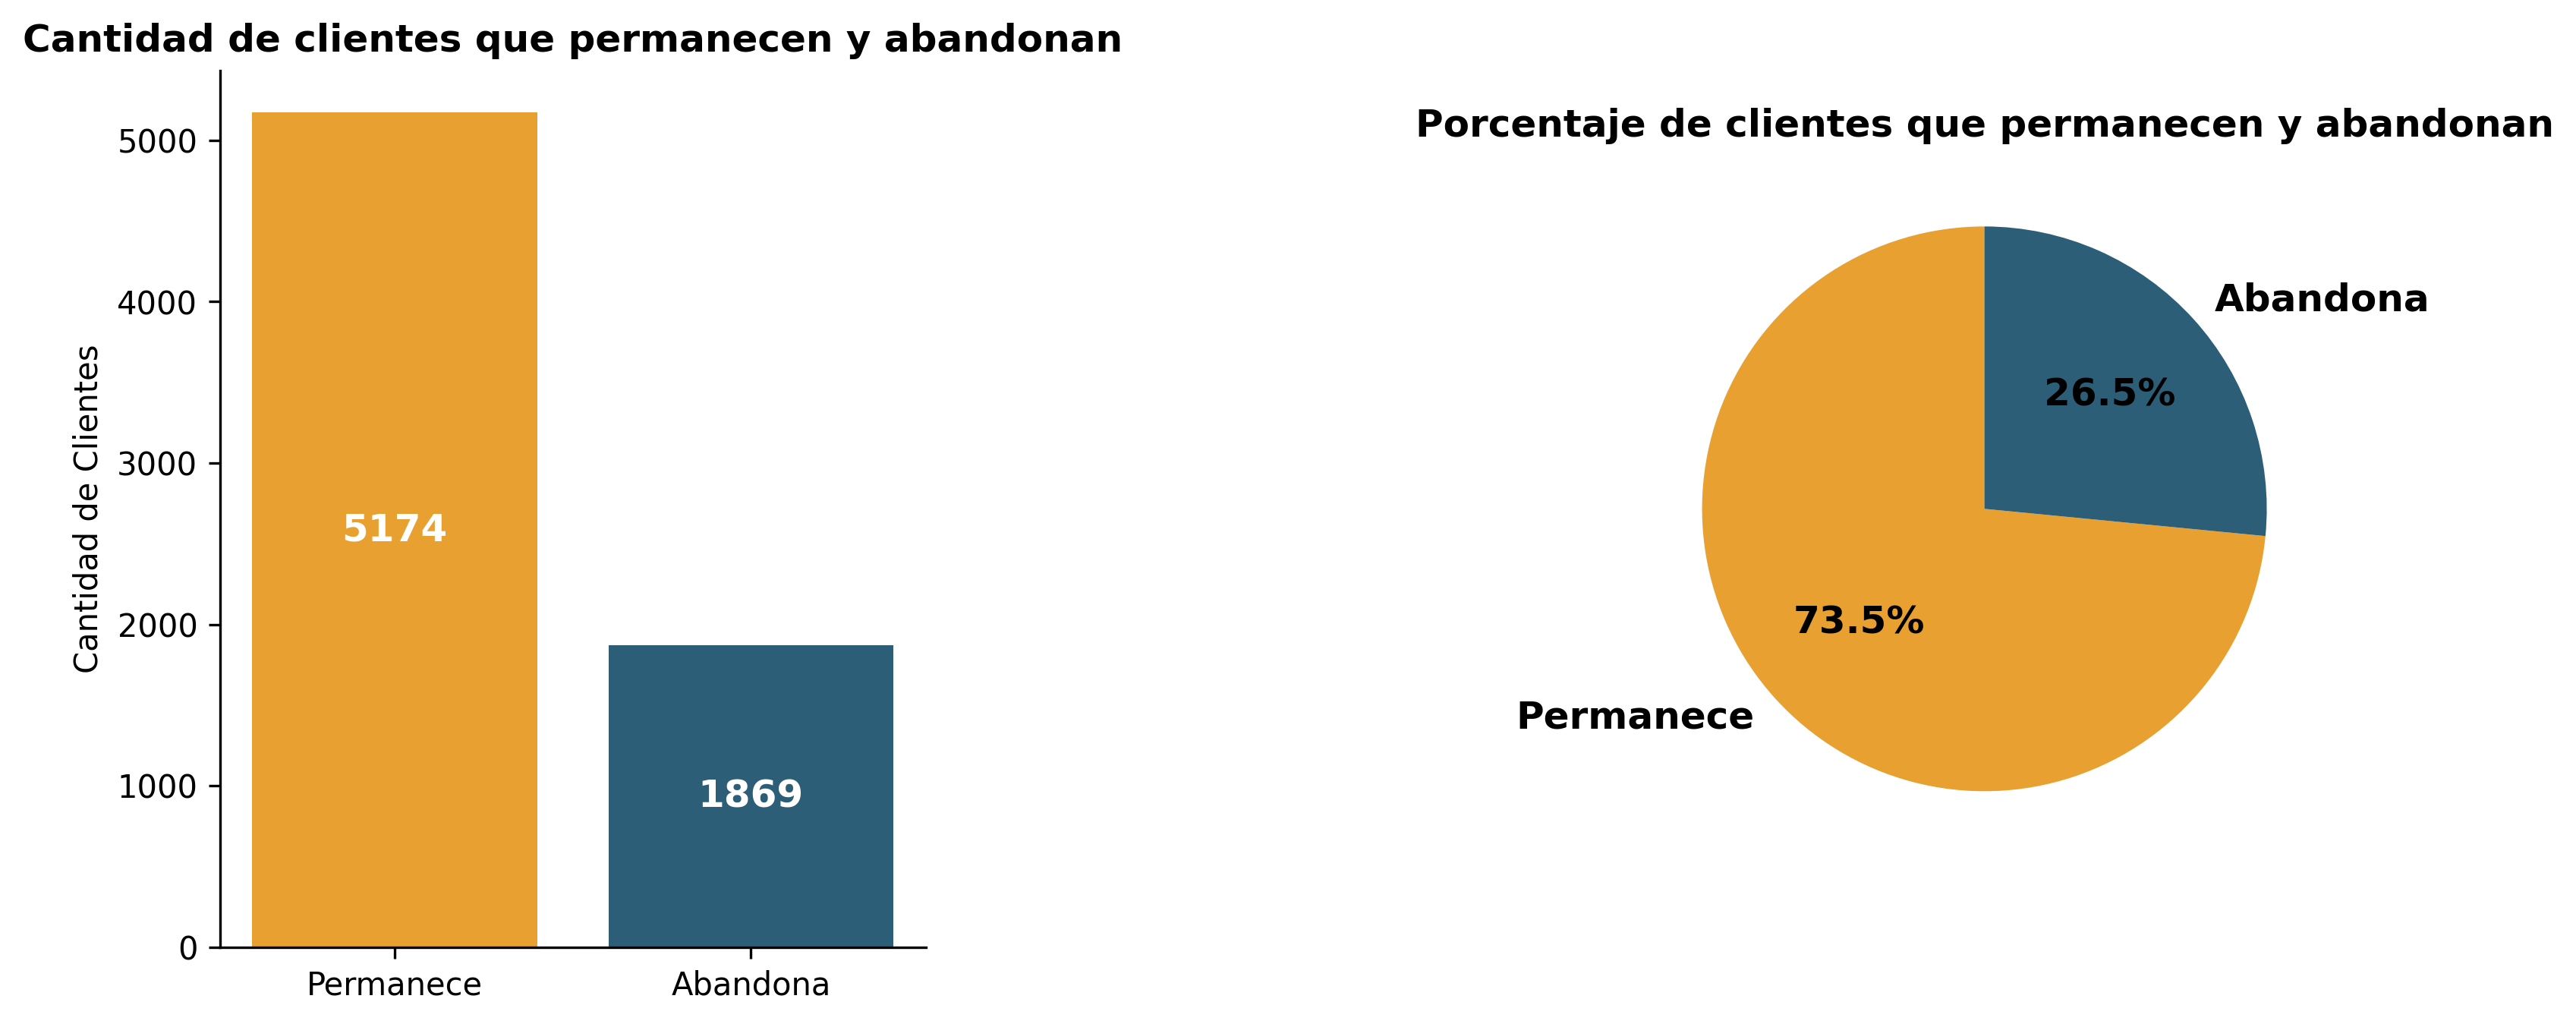

<br><br>- El análisis del tiempo de permanencia indica que los abandonos se concentran principalmente en los primeros meses. A medida que los clientes permanecen más tiempo en la compañía, la probabilidad de que continúen aumenta de forma notable. <br><br><br>

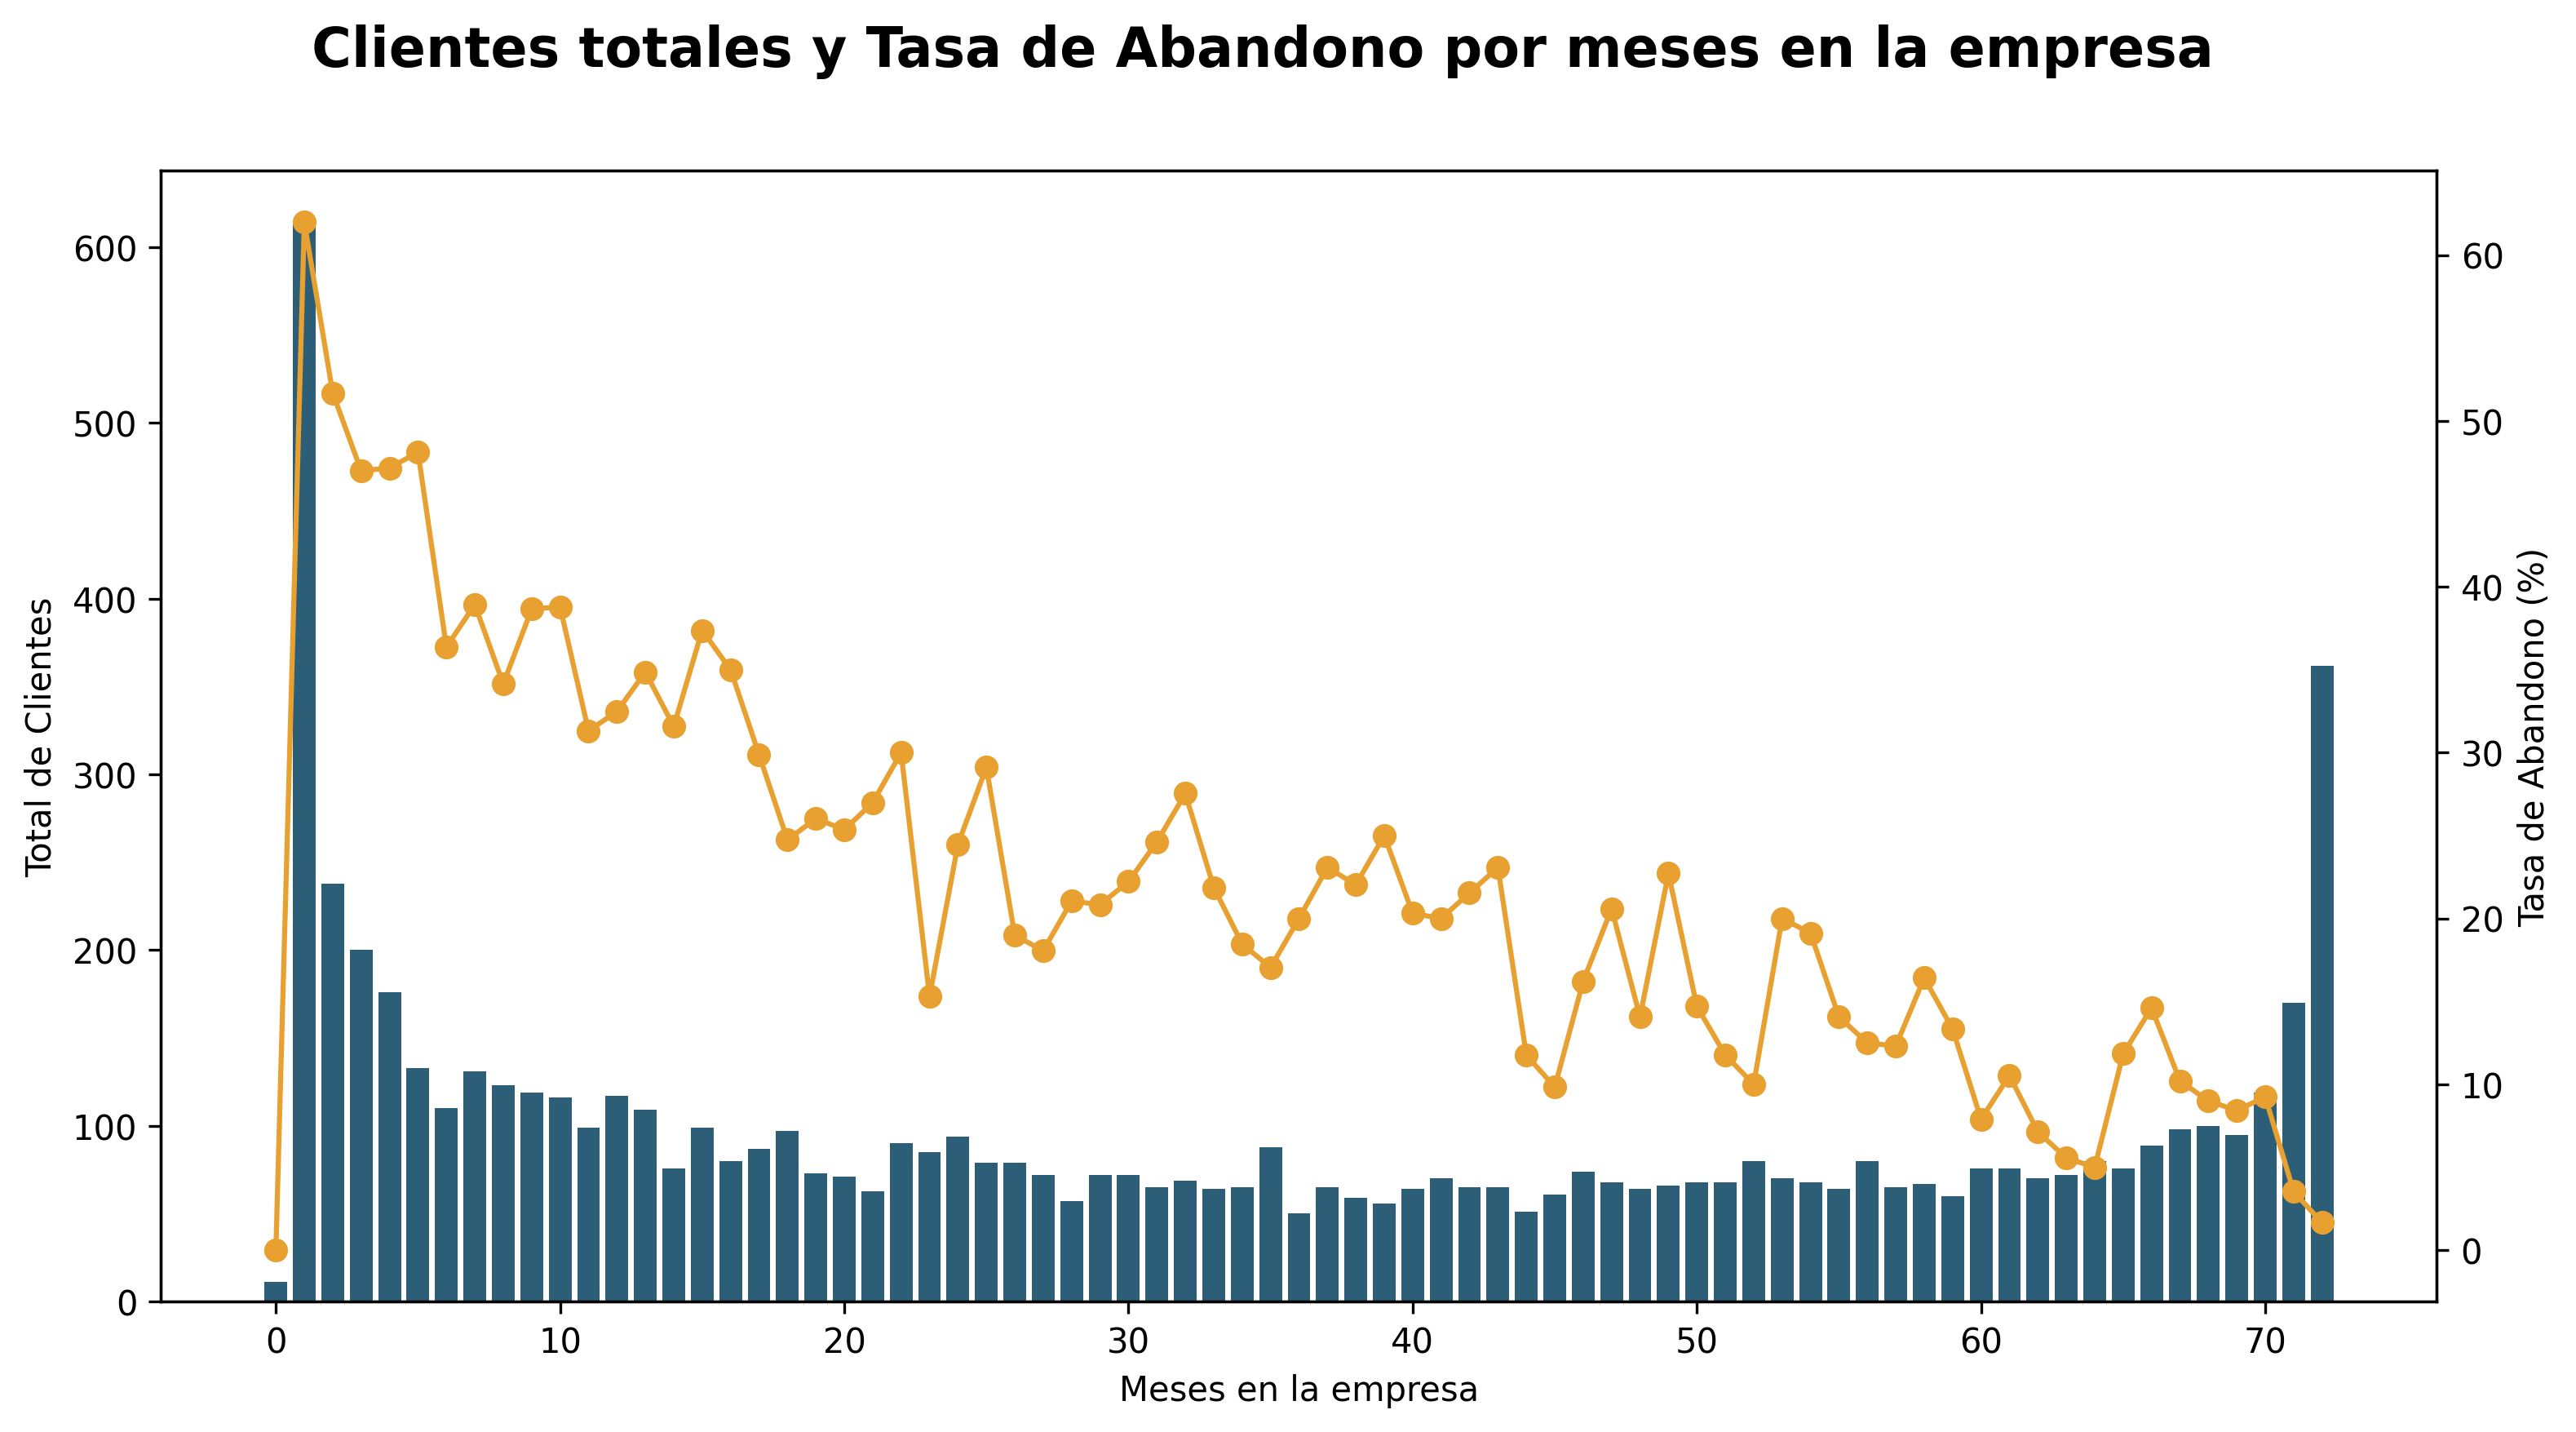

###**📋 Análisis por variables categóricas**

**- Tipo de Contrato:** Los clientes con contrato mensual presentan una mayor tasa de cancelación.

**- Método de Pago:** Los clientes que utilizan tarjeta electrónica como método de pago presentan una mayor tasa de abandono en comparación con quienes optan por otros medios de pago.

**- Género:** No se identificaron diferencias significativas en evasión por género.

**- Servicio Internet:** Se identificó que el servicio de Fibra Óptica presenta la mayor proporción de abandono en comparación con otros tipos de conexión.<br><br>

**Gráficos por categoría:**

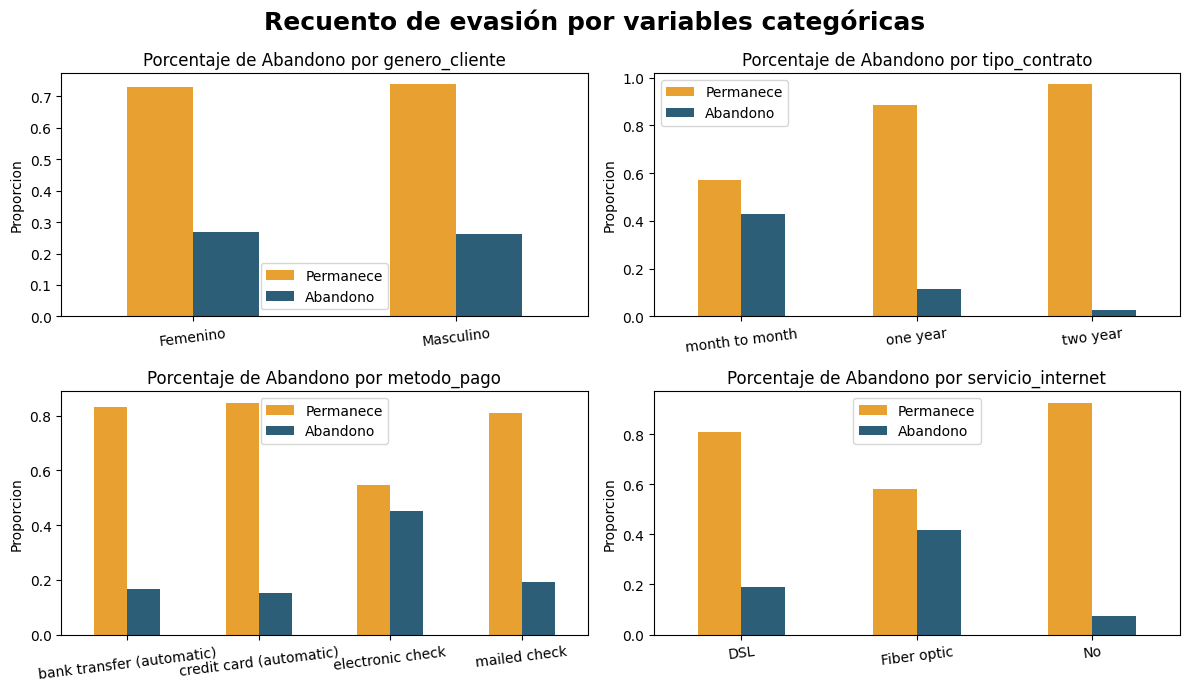

###**📖 Análisis por Variables Binarias**
Se analizó la relación entre abandono y variables binarias.

- Los clientes senior tienden a abandonar con mayor frecuencia que otros grupos etarios, aunque esta diferencia no resulta especialmente marcada en el análisis general.

- Los clientes que se encuentran en pareja presentan una tasa de abandono menor en comparación con aquellos que no lo están. Al igual que los que tienen hijos.

- En el caso del servicio telefónico, no se evidencian diferencias significativas en los niveles de abandono entre quienes lo utilizan y quienes no poseen servicio.

- Por otro lado, se observa que los clientes que reciben su factura en formato electrónico tienden a presentar una mayor tasa de abandono en comparación con aquellos que optan por otros medios.<br><br>

**Gráficos por categoría**:

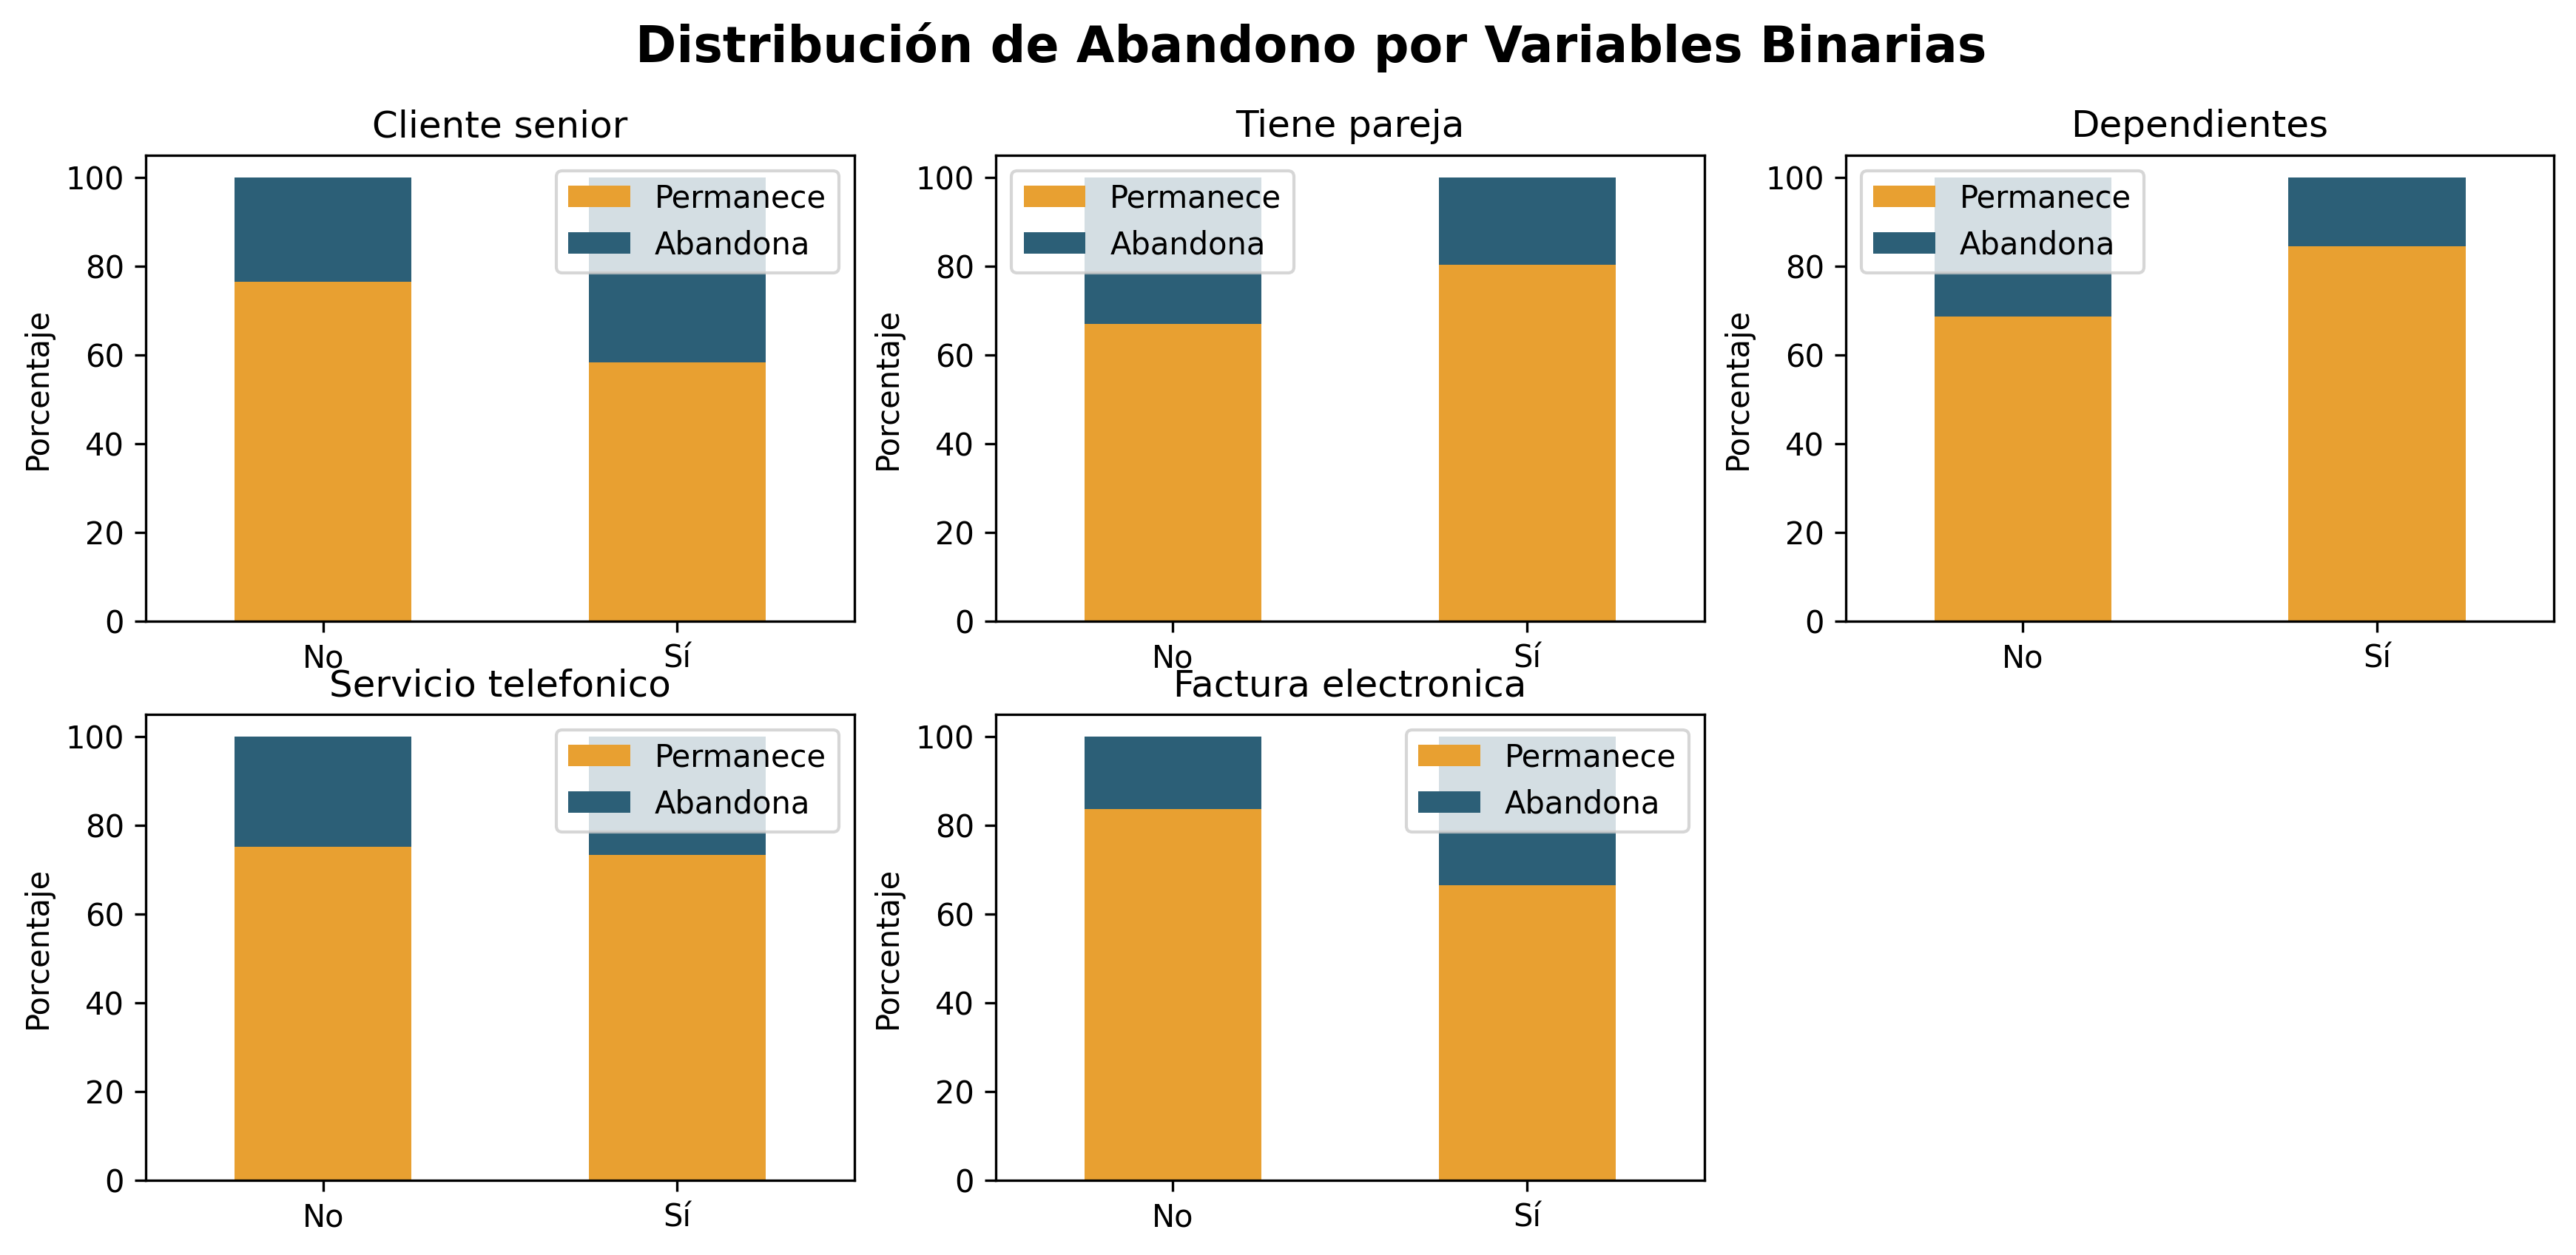

##**📈 Análisis por variables numéricas**

Los clientes con menor antigüedad tienden a cancelar el servicio con mayor frecuencia, mientras que aquellos con mayor tiempo en la compañía muestran un mayor nivel de fidelidad.